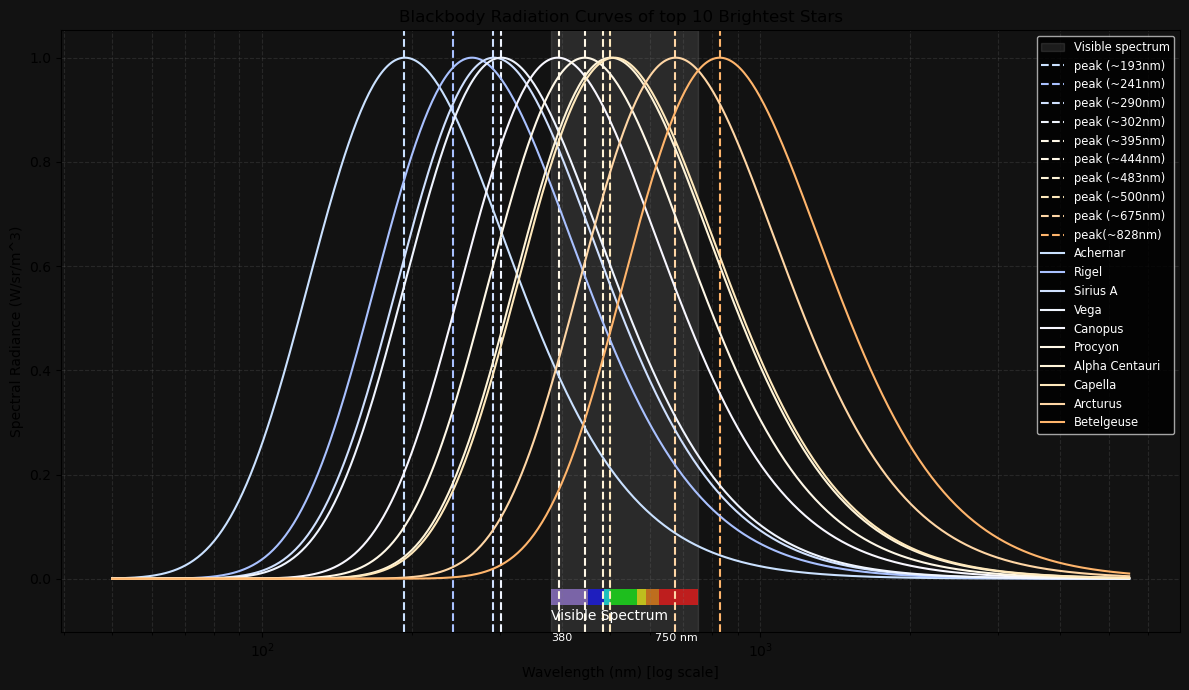

In [1]:
#Blackbody radiation curve of Top 10 brightest stars(other than sun)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle




# Constants
h = 6.626e-34
c = 3e8
k = 1.38e-23

def planck(wavelength, T):
    a = 2.0 * h * c**2
    b = h * c / (wavelength * k * T)
    b = np.clip(b, 1e-10, 700)  # avoid overflow
    return a / ( (wavelength**5) * (np.exp(b) - 1.0) )

# Wavelength in meters (100 nm to 2000 nm)
wavelength = np.logspace(np.log10(50e-9), np.log10(5500e-9), 500)

# Star data: (name, temperature)
stars = [
    ("Achernar",     15000),
    ("Rigel",        11000),
    ("Sirius A",       9940),
    ("Vega",           9602),
    ("Canopus",        7400),
    ("Procyon",        6530),
    ("Alpha Centauri", 5790),
    ("Capella",        5700),
    ("Arcturus",       4290),
    ("Betelgeuse",     3500)
]
'''star_colors = {
    "Achernar":       "#0066FF",  # Bright blue (O/B type)
    "Rigel":          "#4D88FF",  # Blue (B type)
    "Sirius A":       "#5D9EFF",  # Blue-white (A type)
    "Vega":           "#7FB2FF",  # White-blue (A type)
    "Canopus":        "#FFD700",  # Gold (F type)
    "Procyon":        "#FFCC00",  # Yellow (F type)
    "Alpha Centauri": "#FFB90F",  # Yellow (G type)
    "Capella":        "#FFA500",  # Orange-yellow (G type)
    "Arcturus":       "#FF8C00",  # Dark orange (K type)
    "Betelgeuse":     "#FF4500"   # Red-orange (M type)'''


star_colors = {
    "Achernar":      "#CAE1FF",  # Hot blue-white (O/B type)
    "Rigel":         "#A9C1FF",  # Blue-white (B type)
    "Sirius A":      "#D0E1FF",  # White with blue tint (A type)
    "Vega":          "#F0F5FF",  # White (A type)
    "Canopus":       "#F8F7FF",  # Yellow-white (F type)
    "Procyon":       "#FFF8E7",  # Yellow-white (F type)
    "Alpha Centauri": "#FFF4D8",  # Yellow (G type, like our Sun)
    "Capella":       "#FFE9BC",  # Yellow (G type)
    "Arcturus":      "#FFD6A5",  # Orange (K type)
    "Betelgeuse":    "#FFB56C"   # Red-orange (M type)
}
fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor('#121212')  # Very dark gray, almost black
ax.set_facecolor('#121212')  # Same dark color for the plot area
visible_spectrum = [
    (380, 450, '#9370DB'),  # Violet
    (450, 485, '#0000FF'),  # Blue
    (485, 500, '#00FFFF'),  # Cyan
    (500, 565, '#00FF00'),  # Green
    (565, 590, '#FFFF00'),  # Yellow
    (590, 625, '#FF7F00'),  # Orange
    (625, 750, '#FF0000')   # Red
]

# Add visible spectrum band at the bottom of the plot
spectrum_height = 0.03  # Height of the spectrum band

# Create a rectangle for each color in the visible spectrum
for wl_min, wl_max, color in visible_spectrum:
    rect = Rectangle((wl_min, -0.05), wl_max-wl_min, spectrum_height, 
                    facecolor=color, alpha=0.7, edgecolor='none')
    ax.add_patch(rect)

# Add labels for visible spectrum
ax.text(380, -0.08, "Visible Spectrum", fontsize=10, color='white', ha='left')
ax.text(380, -0.12, "380", fontsize=8, color='white', ha='left')
ax.text(750, -0.12, "750 nm", fontsize=8, color='white', ha='right')


# Set the dark style
plt.style.use('dark_background')
# Add visible region of spectrum (approximately 380-750 nm)
ax.axvspan(380, 750, alpha=0.1, color='white', label='Visible spectrum')



    
plt.axvline(193, color="#CAE1FF" , linestyle='--',label= 'peak (~193nm)')
plt.axvline(241, color="#A9C1FF" , linestyle='--',label='peak (~241nm)')
plt.axvline(290,  color="#D0E1FF" ,linestyle='--',label='peak (~290nm)')
plt.axvline(302, color="#F0F5FF" , linestyle='--',label='peak (~302nm)')
plt.axvline(395,  color="#FFF8E7" ,linestyle='--',label='peak (~395nm)')
plt.axvline(444,  color="#FFF8E7",linestyle='--',label='peak (~444nm)')
plt.axvline(483, color= "#FFF4D8", linestyle='--',label='peak (~483nm)')
plt.axvline(500,  color="#FFE9BC",linestyle='--',label='peak (~500nm)')
plt.axvline(675,  color="#FFD6A5" ,linestyle='--',label='peak (~675nm)')
plt.axvline(828, color="#FFB56C",linestyle='--',label='peak(~828nm)')

      
# Plot
# Create figure with dark background


# Plot each star's blackbody curve with its spectral color
for i, (name, T) in enumerate(stars):
    I = planck(wavelength, T)
    I /= np.max(I)
    
    # Use the spectral color for this star
    color = star_colors[name]
    
    line, = ax.plot(wavelength * 1e9, I, label=f"{name}", color=color)
    
'''plt.figure(figsize=(12, 7))
for name, T in stars:
    I = planck(wavelength, T)
    I /= np.max(I)
   
    plt.plot(wavelength * 1e9, I, label=name)'''
    

# X-axis log scale
plt.xscale('log')
plt.xlabel("Wavelength (nm) [log scale]")
plt.ylabel('Spectral Radiance (W/sr/m^3)')
plt.title("Blackbody Radiation Curves of top 10 Brightest Stars")
plt.grid(True, which='both', linestyle='--', alpha=0.2, color='gray')
plt.legend(loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()

 
 

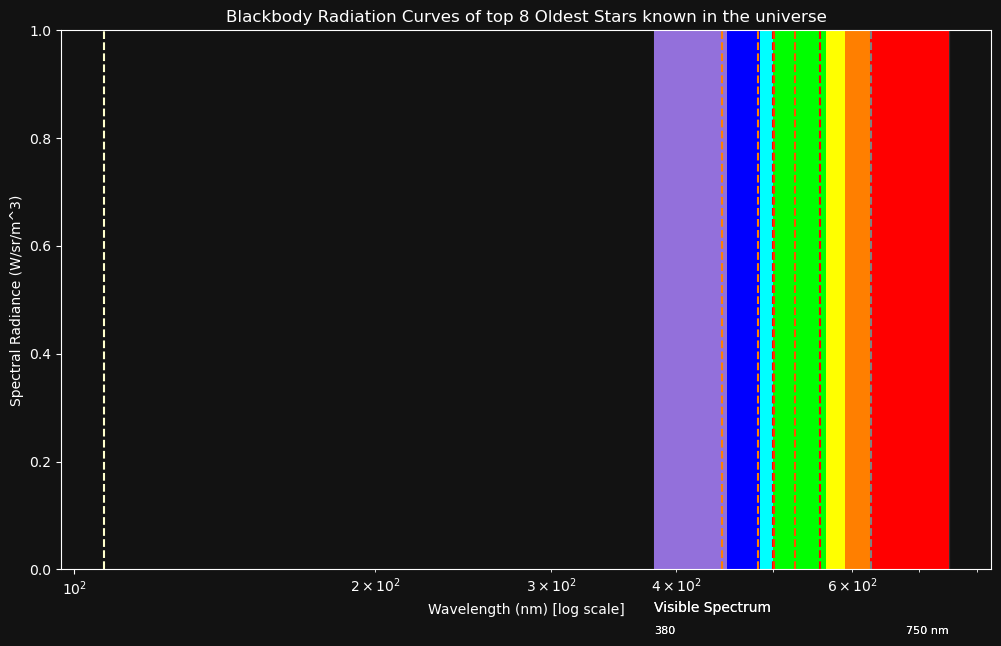

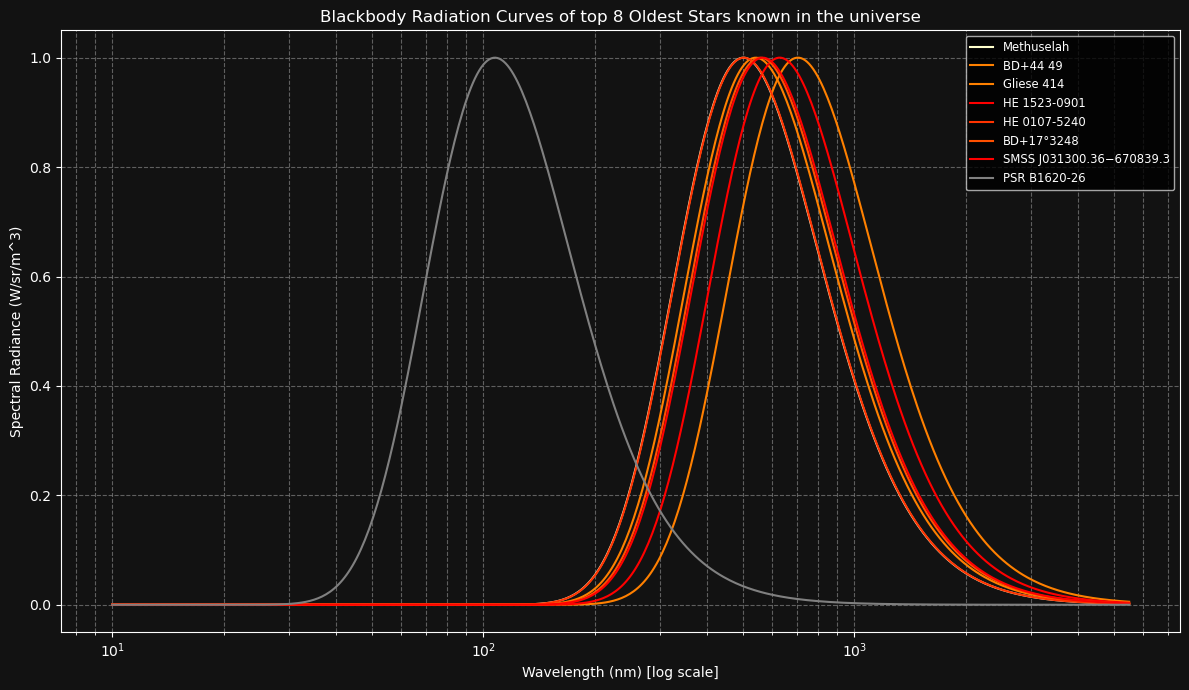

In [2]:
#Blackbody radiation curve of top 8 oldest known stars in universe

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle  # Add this import for Rectangle

# Constants
h = 6.626e-34
c = 3e8
k = 1.38e-23

def planck(wavelength, T):
    a = 2.0 * h * c**2
    b = h * c / (wavelength * k * T)
    b = np.clip(b, 1e-10, 700)  # avoid overflow
    return a / ( (wavelength**5) * (np.exp(b) - 1.0) )

# Wavelength in meters (100 nm to 2000 nm)
wavelength = np.logspace(np.log10(10e-9), np.log10(5500e-9), 500)

# Create figure with dark background
fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor('#121212')  # Very dark gray, almost black
ax.set_facecolor('#121212')  # Same dark color for the plot area
plt.style.use('dark_background')


# Add visible region of spectrum (approximately 380-750 nm)
ax.axvspan(380, 750, alpha=0.1, color='white', label='Visible spectrum')
visible_spectrum = [
    (380, 450, '#9370DB'),  # Violet
    (450, 485, '#0000FF'),  # Blue
    (485, 500, '#00FFFF'),  # Cyan
    (500, 565, '#00FF00'),  # Green
    (565, 590, '#FFFF00'),  # Yellow
    (590, 625, '#FF7F00'),  # Orange
    (625, 750, '#FF0000')   # Red

]

# Add visible spectrum band at the bottom of the plot
spectrum_height = 0.03  # Height of the spectrum band
y_min, y_max = 0, 1.05  # Y-axis limits

# Create a rectangle for each color in the visible spectrum
for wl_min, wl_max, color in visible_spectrum:
    rect = Rectangle((wl_min, -0.05), wl_max-wl_min, spectrum_height, 
                    facecolor=color, alpha=0.7, edgecolor='none')
    ax.add_patch(rect)



# Add labels for visible spectrum
ax.text(380, -0.08, "Visible Spectrum", fontsize=10, color='white', ha='left')
ax.text(380, -0.12, "380", fontsize=8, color='white', ha='left')
ax.text(750, -0.12, "750 nm", fontsize=8, color='white', ha='right')
visible_spectrum = [
    (380, 450, '#9370DB'),  # Violet
    (450, 485, '#0000FF'),  # Blue
    (485, 500, '#00FFFF'),  # Cyan
    (500, 565, '#00FF00'),  # Green
    (565, 590, '#FFFF00'),  # Yellow
    (590, 625, '#FF7F00'),  # Orange
    (625, 750, '#FF0000')   # Red
]

# Add visible spectrum band at the bottom of the plot
spectrum_height = 3  # Height of the spectrum band
y_min, y_max = 0, 3  # Y-axis limits

# Create a rectangle for each color in the visible spectrum
for wl_min, wl_max, color in visible_spectrum:
    rect = Rectangle((wl_min, -0.05), wl_max-wl_min, spectrum_height, 
                    facecolor=color, alpha=1, edgecolor='none')
    ax.add_patch(rect)

# Add labels for visible spectrum
ax.text(380, -0.08, "Visible Spectrum", fontsize=10, color='white', ha='left')
ax.text(380, -0.12, "380", fontsize=8, color='white', ha='left')
ax.text(750, -0.12, "750 nm", fontsize=8, color='white', ha='right')





# Star data: (name, temperature)
stars = [
    ("Methuselah",     5777),
    ("BD+44 49",        5351),
    ("Gliese 414",       4120),
    ("HE 1523-0901",    4612),
    ("HE 0107-5240",     5765),
    ("BD+17°3248",        5200),
    ("SMSS J031300.36−670839.3", 5125),
    ("PSR B1620-26",       27000),
    #("Arcturus",       4290),
    #("Betelgeuse",     3500)
]


star_colors = {
    "Methuselah":      "#FFFFCC",  # Hot blue-white (O/B type)
    "BD+44 49":         "#FF8000",  # Blue-white (B type)
    "Gliese 414":      "#FF8000",  # White with blue tint (A type)
    "HE 1523-0901":          "#FF0000",  # White (A type)
    "HE 0107-5240":       "#FF3300",  # Yellow-white (F type)
    "BD+17°3248":       "#FF5000",  # Yellow-white (F type)
    "SMSS J031300.36−670839.3": "#FF0000",  # Yellow (G type, like our Sun)
    "PSR B1620-26":       "#808080",  # Yellow (G type)
    #"Arcturus":      "#FFD6A5",  # Orange (K type)
    #"Betelgeuse":    "#FFB56C"   # Red-orange (M type)
}

# Set the dark style
plt.axvline(107,  color="#FFFFCC" ,linestyle='--',label='peak (~107nm)')
plt.axvline(444,  color="#FF8000",linestyle='--',label='peak (~444nm)')
plt.axvline(483, color= "#FF8000", linestyle='--',label='peak (~483nm)')
plt.axvline(500,  color="#FF0000",linestyle='--',label='peak (~500nm)')
plt.axvline(501.6, color="#FF3300" , linestyle='--',label= 'peak (~501.6nm)')
plt.axvline(525.8, color="#FF5000" , linestyle='--',label='peak (~525.8nm)')
plt.axvline(557,  color="#FF0000" ,linestyle='--',label='peak (~557nm)')
plt.axvline(626, color="#808080" , linestyle='--',label='peak (~626nm)')

#plt.axvline(675,  color="#FFD6A5" ,linestyle='--',label='peak (~675nm)')
#plt.axvline(828, color="#FFB56C",linestyle='--',label='peak(~828nm)')
plt.xscale('log')
plt.xlabel("Wavelength (nm) [log scale]")
plt.ylabel('Spectral Radiance (W/sr/m^3)')
plt.title("Blackbody Radiation Curves of top 8 Oldest Stars known in the universe")
plt.show()

      
# Plot
fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor('#121212')  # Very dark gray, almost black
ax.set_facecolor('#121212')  # Same dark color for the plot area



# Plot each star's blackbody curve with its spectral color
for i, (name, T) in enumerate(stars):
    I = planck(wavelength, T)
    I /= np.max(I)
    
    # Use the spectral color for this star
    color = star_colors[name]
    
    line, = ax.plot(wavelength * 1e9, I, label=f"{name}", color=color)
    
'''plt.figure(figsize=(12, 7))
for name, T in stars:
    I = planck(wavelength, T)
    I /= np.max(I)
   
    plt.plot(wavelength * 1e9, I, label=name)'''
    

# X-axis log scale
plt.xscale('log')
plt.xlabel("Wavelength (nm) [log scale]")
plt.ylabel('Spectral Radiance (W/sr/m^3)')
plt.title("Blackbody Radiation Curves of top 8 Oldest Stars known in the universe")
plt.grid(True, which='both', linestyle='--', alpha=0.7, color='gray')
plt.legend(loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()
